In [2]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import typing

In [8]:
hallmarks_dataframe = pd.read_csv('../Data/Classification/city_year.csv')
hallmarks_dataframe.head(6)

,Unnamed: 0,ImageName,city,year
0,0,1_original.jpg,birmingham,1914
1,1,2_original.jpg,birmingham,1917
2,2,3_original.jpg,birmingham,1901
3,3,4_original.jpg,sheffield,1901
4,4,5_original.jpg,birmingham,1904
5,5,6_original.jpg,chester,1921


In [6]:
def show_hallmark_in_dataframe(index: int) -> typing.NoReturn:
    """
    Show hallmark in dataframe by index

    :param index: index of hallmark in dataframe
    :return:
    """

    hallmark_dataframe = pd.read_csv('../Data/Classification/city_year.csv')
    target_hallmark = hallmark_dataframe.iloc[index]

    image = cv2.imread(
        os.path.join('../Data/Classification/images/', target_hallmark['ImageName'])
    )

    assert image is not None, "Error! Image is None (Probably path incorrect)"

    return  image

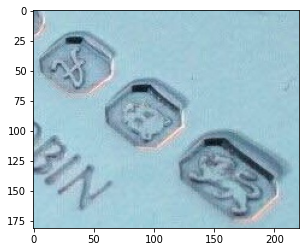

In [11]:
plt.imshow(show_hallmark_in_dataframe(245))
plt.show()

# Analysing size of hallmarks

In [14]:
path_to_folder_with_images = "../Data/Classification/images"
hallmarks_size = []

for image_name in os.listdir(path_to_folder_with_images):
    hallmark = cv2.imread(os.path.join(path_to_folder_with_images, image_name))
    hallmarks_size.append(hallmark.shape)

In [15]:
heights = np.array(hallmarks_size)[:, 0]
widths = np.array(hallmarks_size)[:, 1]
print(f"Mean values: {np.mean(heights), np.mean(widths)}")
print(f"Median values: {np.median(heights), np.median(widths)}")

Mean values: (138.6958041958042, 292.3531468531468)
Median values: (111.5, 276.0)


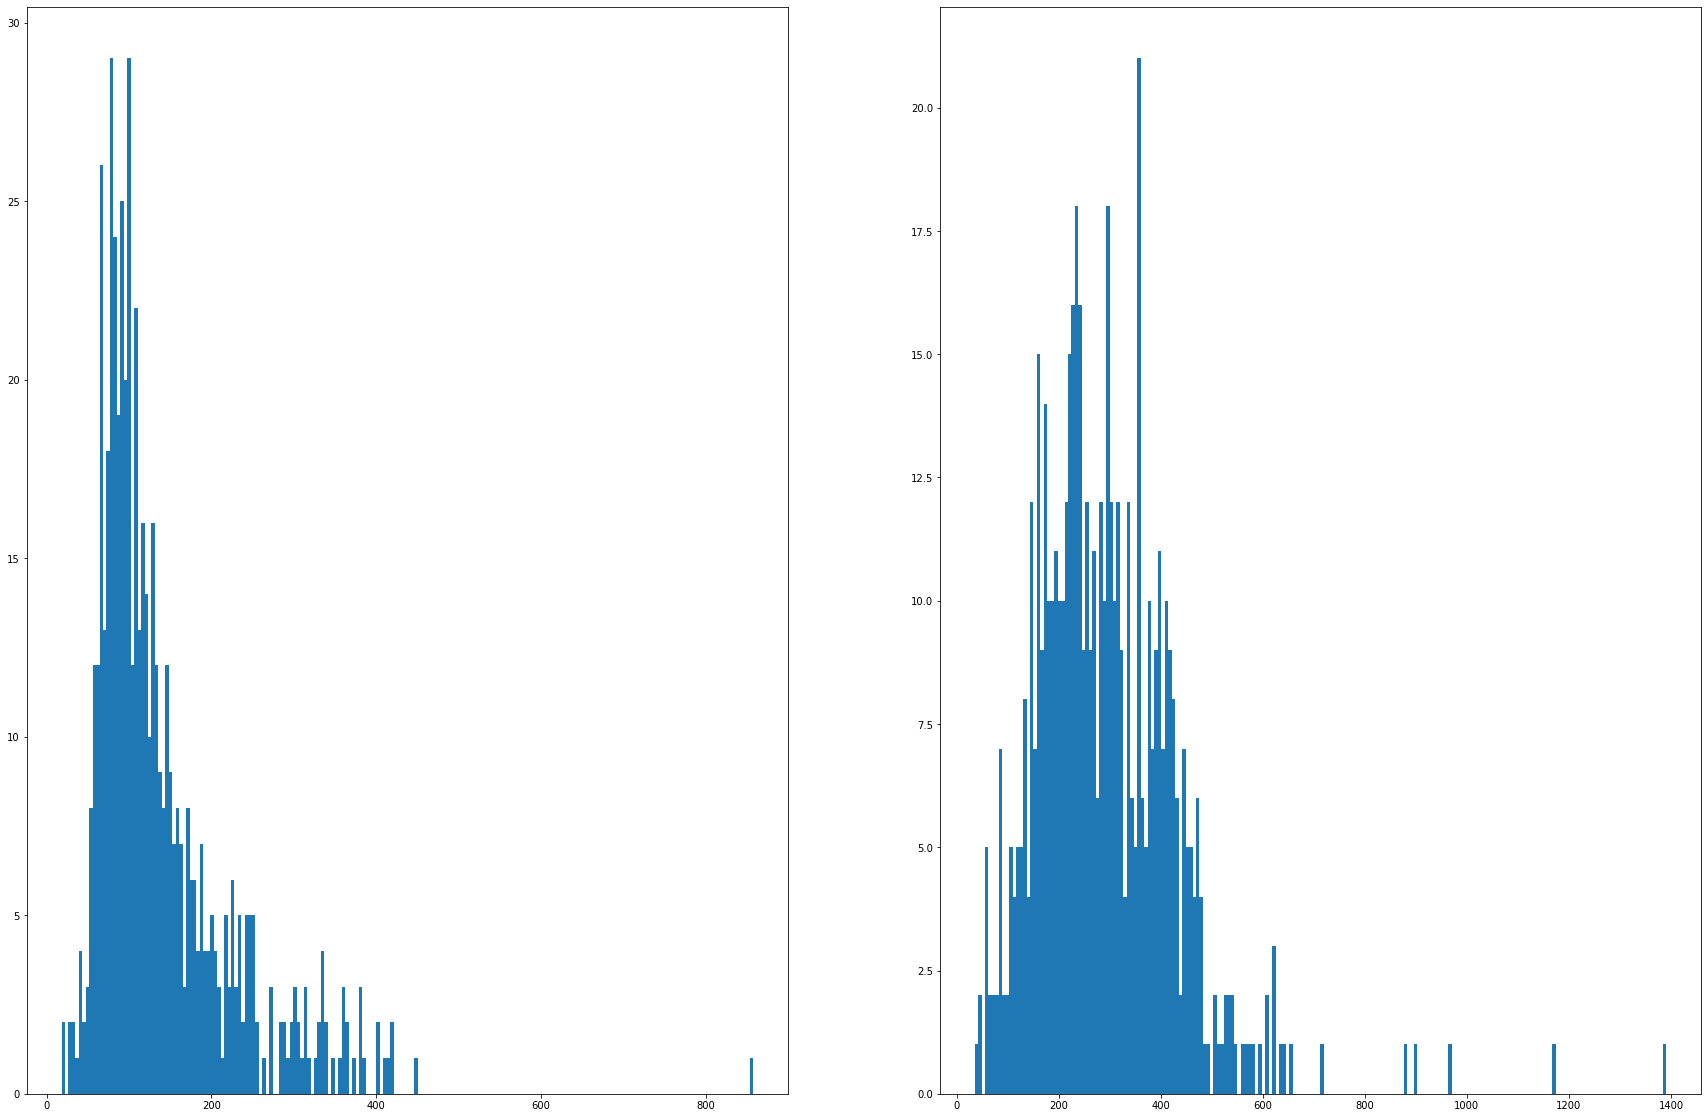

In [16]:
plt.figure(figsize=(30, 20))
plt.subplot(1, 2, 1)
plt.hist(heights, bins=200)
plt.subplot(1, 2, 2)
plt.hist(widths, bins=200)
plt.show()

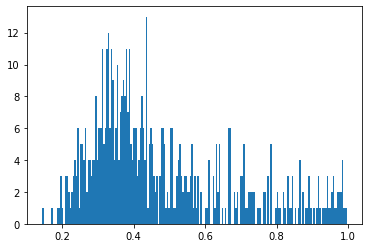

In [65]:
proportion = heights / widths
plt.hist(proportion, bins=200)
invalid_rotation = np.argwhere(proportion >= 1)

In [66]:
"""
Images with rotation > 1 was manually rotated.
"""
path_to_folder_with_images = "../Data/Classification/images"

for i, image_name in enumerate(os.listdir(path_to_folder_with_images)):
    hallmark = cv2.imread(os.path.join(path_to_folder_with_images, image_name))
    if i in invalid_rotation:
        print(image_name)
        plt.imshow(hallmark)
        plt.show()

# After deletion of incorrect images

Mean values: (95.83823529411765, 262.33613445378154)
Median values: (87.0, 237.0)


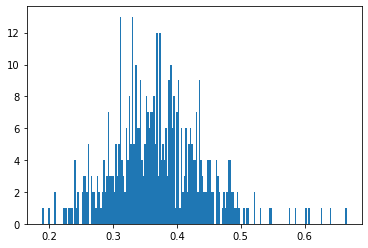

In [3]:
path_to_folder_with_images = "../Data/Classification/imagesBadSquaredDeleted"
hallmarks_size = []

for image_name in os.listdir(path_to_folder_with_images):
    hallmark = cv2.imread(os.path.join(path_to_folder_with_images, image_name))
    hallmarks_size.append(hallmark.shape)

heights = np.array(hallmarks_size)[:, 0]
widths = np.array(hallmarks_size)[:, 1]
print(f"Mean values: {np.mean(heights), np.mean(widths)}")
print(f"Median values: {np.median(heights), np.median(widths)}")

proportion = heights / widths
plt.hist(proportion, bins=200)
invalid_rotation = np.argwhere(proportion >= 0.5)

In [4]:
invalid_rotation_names = []
for i, image_name in enumerate(os.listdir(path_to_folder_with_images)):
    hallmark = cv2.imread(os.path.join(path_to_folder_with_images, image_name))
    if i in invalid_rotation:
        invalid_rotation_names.append(image_name)

# Create dataframe for cleaned data

In [19]:
list_images = os.listdir('../Data/Classification/CleanedData/images')
data_frame = pd.DataFrame(columns=['ImageName', 'city', 'year'])

for i, row in pd.read_csv('../Data/Classification/city_year.csv').iterrows():
    if row['ImageName'] in list_images:
        data_frame = data_frame.append(row, ignore_index=True)

data_frame.to_csv('../Data/Classification/CleanedData/city_year_cleaned.csv', ignore_index=True)

TypeError: to_csv() got an unexpected keyword argument 'ignore_index'

In [20]:

data_frame['city'].value_counts()

london        209
birmingham    147
sheffield      92
chester        13
edinburgh       6
glasgow         5
dublin          3
Name: city, dtype: int64